In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [14]:
#Data

#German credit
#lịch sử tín dụng của 1000 tài khoản khác nhau -> dựa vào data dự đoán khả 
#năng khách trả nợ hay không. Dứ liệu gồm 20 features, 7 numeric, 13 categorical

#Trạng thái tài khoản hiện có.
#Kỳ hạn theo tháng (Duration)
#Lịch sử tín dụng
#Mục đích
#Dư nợ tín dụng (Credit amount)
#Tài khoản tiết kiệm (Savings account)
#Số năm làm việc liên tục gần nhất tới thời điểm hiện tại
#Tỷ lệ trả góp (Installment rate) theo thu nhập khả dụng
#Giới tính và trạng thái hôn nhân
#Những người nợ khác
#Thời gian cư trú tại nơi ở hiện tại
#Bất động sản
#Tuổi
#Trả góp khác
#Nhà ở
#Số lượng khoản vay tại ngân hàng
#Nghề nghiệp
#Số người phụ thuộc
#Điện thoại
#Có phải là lao động nước ngoài\

#output Good, Bad



In [15]:
import pandas as pd

df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", 
                 header=None, names=['StaAcc', 'DuMon', 'CredHis', 'Purpose', 'CredAmt', 'SavAcc', \
                                     'PreEmpl', 'InsRt', 'PerSta', 'OthDebtor', 'PreRe', 'Property', \
                                     'Age', 'IntPla', 'Housing', 'ExstCredit', 'Job', 'NoMain', 'Phone', 'ForWorker', "Response"], 
                 index_col=None, sep=" ")
df.head()

StaAcc  DuMon CredHis Purpose  CredAmt SavAcc PreEmpl  InsRt PerSta  \
0    A11      6     A34     A43     1169    A65     A75      4    A93   
1    A12     48     A32     A43     5951    A61     A73      2    A92   
2    A14     12     A34     A46     2096    A61     A74      2    A93   
3    A11     42     A32     A42     7882    A61     A74      2    A93   
4    A11     24     A33     A40     4870    A61     A73      3    A93   

  OthDebtor  ...  Property Age  IntPla Housing ExstCredit   Job NoMain  Phone  \
0      A101  ...      A121  67    A143    A152          2  A173      1   A192   
1      A101  ...      A121  22    A143    A152          1  A173      1   A191   
2      A101  ...      A121  49    A143    A152          1  A172      2   A191   
3      A103  ...      A122  45    A143    A153          1  A173      2   A191   
4      A101  ...      A124  53    A143    A153          2  A173      2   A191   

  ForWorker Response  
0      A201        1  
1      A201        2  
2      A201        1  
3      A201        1  
4      A201        2  

[5 rows x 21 columns]

In [16]:
#Các trường dữ liệu và định dạng
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StaAcc      1000 non-null   object
 1   DuMon       1000 non-null   int64 
 2   CredHis     1000 non-null   object
 3   Purpose     1000 non-null   object
 4   CredAmt     1000 non-null   int64 
 5   SavAcc      1000 non-null   object
 6   PreEmpl     1000 non-null   object
 7   InsRt       1000 non-null   int64 
 8   PerSta      1000 non-null   object
 9   OthDebtor   1000 non-null   object
 10  PreRe       1000 non-null   int64 
 11  Property    1000 non-null   object
 12  Age         1000 non-null   int64 
 13  IntPla      1000 non-null   object
 14  Housing     1000 non-null   object
 15  ExstCredit  1000 non-null   int64 
 16  Job         1000 non-null   object
 17  NoMain      1000 non-null   int64 
 18  Phone       1000 non-null   object
 19  ForWorker   1000 non-null   object
 20  Response 

In [59]:
#Thống kê mô tả
numeric = df.describe()
numeric

DuMon       CredAmt        InsRt        PreRe          Age  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean     20.903000   3271.258000     2.973000     2.845000    35.546000   
std      12.058814   2822.736876     1.118715     1.103718    11.375469   
min       4.000000    250.000000     1.000000     1.000000    19.000000   
25%      12.000000   1365.500000     2.000000     2.000000    27.000000   
50%      18.000000   2319.500000     3.000000     3.000000    33.000000   
75%      24.000000   3972.250000     4.000000     4.000000    42.000000   
max      72.000000  18424.000000     4.000000     4.000000    75.000000   

        ExstCredit       NoMain     Response  
count  1000.000000  1000.000000  1000.000000  
mean      1.407000     1.155000     1.300000  
std       0.577654     0.362086     0.458487  
min       1.000000     1.000000     1.000000  
25%       1.000000     1.000000     1.000000  
50%       1.000000     1.000000     1.000000  
75%       2.000000     1.000000     2.000000  
max       4.000000     2.000000     2.000000

In [18]:
#Kết quả thống kê mô tả sơ bộ trên các biến numeric cho thấy các biến khác biệt nhau về đơn vị lớn. Trung bình thấp nhất là 1.155 và cao nhất lên tới 3271.258

Index(['DuMon', 'CredAmt', 'InsRt', 'PreRe', 'Age', 'ExstCredit', 'NoMain',
       'Response'],
      dtype='object')
number of numeric field:  8


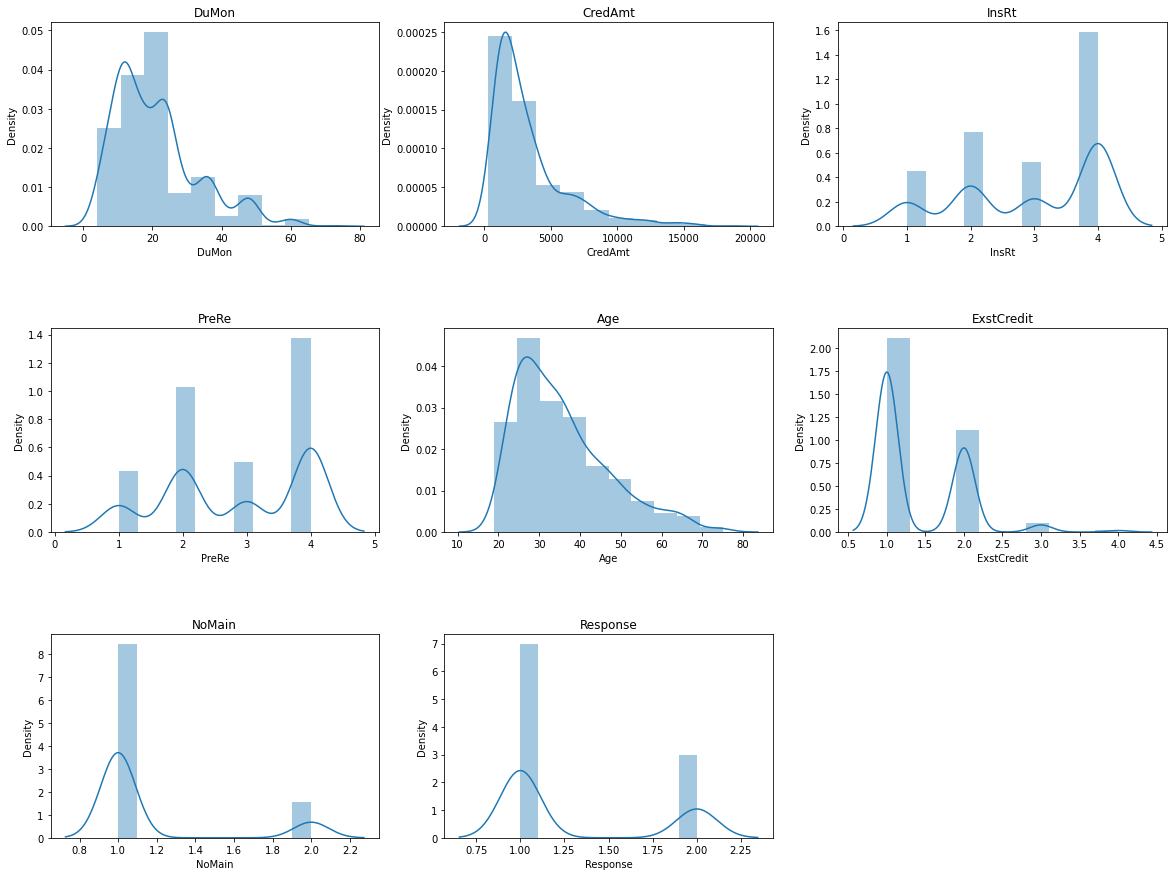

In [71]:
import seaborn as sns
import warnings
numeric_cols = numeric.select_dtypes(include=['float','int']).columns
print(numeric_cols)
def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(df, numeric_cols)

Index(['StaAcc', 'CredHis', 'Purpose', 'SavAcc', 'PreEmpl', 'PerSta',
       'OthDebtor', 'Property', 'IntPla', 'Housing', 'Job', 'Phone',
       'ForWorker'],
      dtype='object')
number of category field:  13


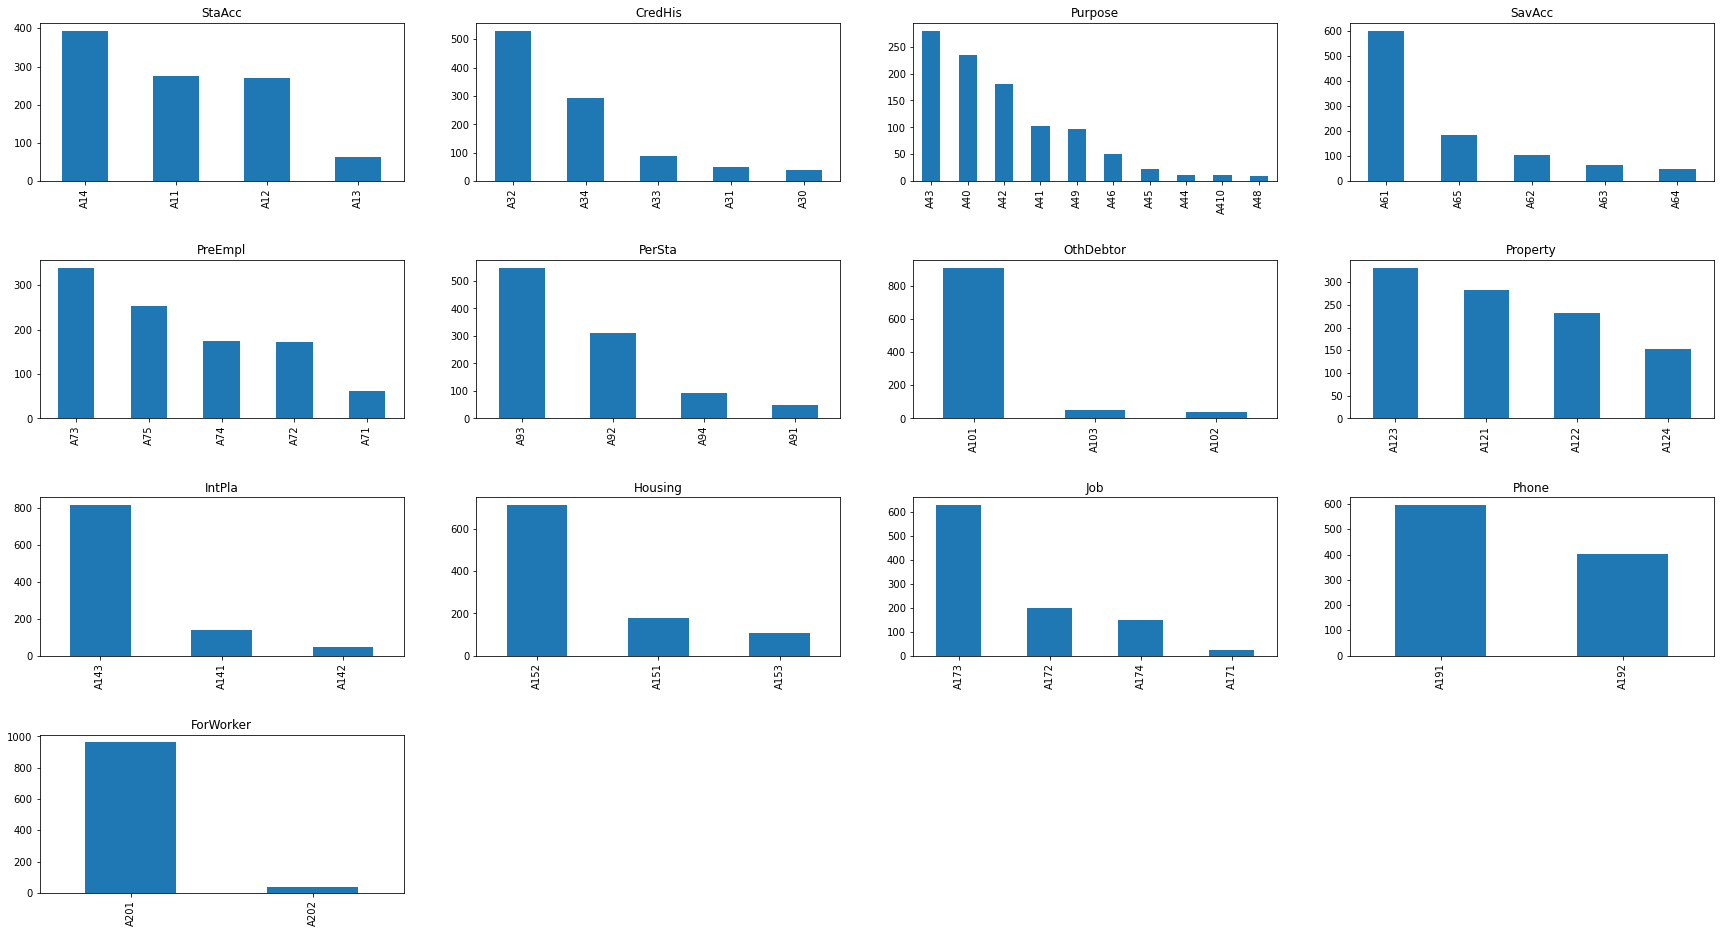

In [69]:
# Đối với biến phân loại
cate_cols = df.select_dtypes('O').columns
print(cate_cols)

def _plot_bar_classes(df, cols):
    df[cols].value_counts().plot.bar()

def _distribution_cate(df, cate_cols, row = 1, col = 2, figsize = (20, 5)):
  '''
  cate_cols: list các tên cột
  row: số lượng dòng trong lưới đồ thị
  col: số lượng cột trong lưới đồ thị
  figsize: kích thước biểu đồ
  '''
  print('number of category field: ', len(cate_cols))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)    
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(df, cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(df, cate_cols, row = 4, col = 4, figsize = (30, 16))

In [72]:
#Phân chia tập train/val/test

df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['Response'])
X_train = df_train.copy()
y_train = X_train.pop("Response")

X_test = df_test.copy()
y_test = X_test.pop("Response")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 20) (800,)
(200, 20) (200,)


In [ ]:
#Preprocessing model
#Số hoá cho các biến đầu vào dạng phân loại (dùng OneHotEncoder).
#Xử lý missing data (dùng SimpleImputer).
#Loại bỏ các outlier (dùng MinMaxScaler)

In [73]:



#Tách biệt xử lý cho biến liên tục và biến phân loại
# Lấy list names của các biến phân loại và biến liên tục.
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

In [75]:
print(cat_names)
print(num_names)

['StaAcc', 'CredHis', 'Purpose', 'SavAcc', 'PreEmpl', 'PerSta', 'OthDebtor', 'Property', 'IntPla', 'Housing', 'Job', 'Phone', 'ForWorker']
[]


In [76]:
# Pipeline xử lý cho biến phân loại
cat_pl= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Xử lý missing data bằng cách thay thế most frequent
        ('onehot', OneHotEncoder()), # Biến đổi giá trị của biến phân loại thành véc tơ OneHot
    ]
)

In [77]:
# Pipeline xử lý cho biến liên tục
num_pl = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)), # Xử lý missing data bằng cách dự báo KNN với n=7.
           ('scaler', MinMaxScaler()) # Xử lý missing data bằng MinMax scaler
    ]
)

In [78]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names), # áp dụng pipeline cho biến liên tục
        ('cat', cat_pl, cat_names), # áp dụng pipeline cho biến phân loại
    ]
)

In [79]:
# Completed training pipeline
completed_pl = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("classifier", RandomForestClassifier())
    ]
)

# training
completed_pl.fit(X_train, y_train)

# accuracy
y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_pred = completed_pl.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on train: 1.00
Accuracy on test: 0.71


In [82]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
import numpy as np

# Tính fbeta score
def fbeta(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=np.sqrt(5))

In [84]:
#Đánh giá cheó (cross validation)





#Thực hiện cross validation


#Để thực hiện cross validation chúng ta sử dụng class RepeatedStratifiedKFold() với n_splits là số lần chia dữ liệu và n_repeates là số lần lặp lại quá trình cross validation. 
#Như vậy chúng ta sẽ có tổng cộng n_splits x n_repeats = 30 lượt đánh giá dữ liệu.
# Xác định KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Xác định metric cho mô hình
metric = make_scorer(fbeta)
# Đánh giá mô hình
scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
print('Mean Fbeta: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))

Mean Fbeta: 0.873 0.037


In [86]:
# list các mô hình được lựa chọn
models = [GaussianNB(), LogisticRegression(), KNeighborsClassifier(), MLPClassifier(), RandomForestClassifier()]

# Xác định KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

all_scores = []
# Đánh giá toàn bộ các mô hình trên tập K-Fold đã chia
for model in models:
  completed_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('classifier', model)]
  )

  scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
  all_scores.append(scores)

Text(0.5, 1.0, 'Scores Metrics')

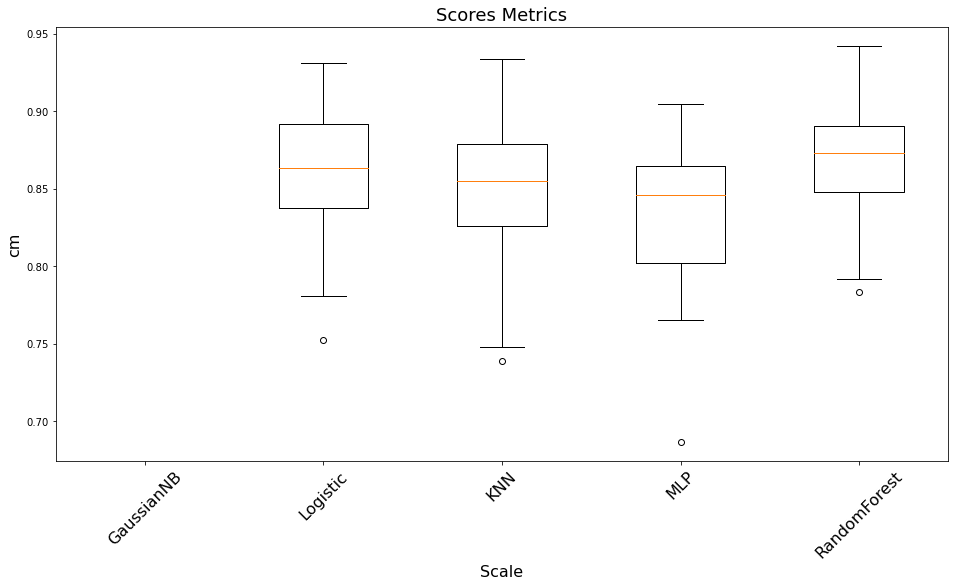

In [87]:
import matplotlib.pyplot as plt
model_names = ['GaussianNB', 'Logistic', 'KNN', 'MLP', 'RandomForest']

# Draw bboxplot 
plt.figure(figsize=(16, 8))
plt.boxplot(all_scores)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=16)
plt.title("Scores Metrics", fontsize=18)

In [ ]:
#Nhìn vào biểu đồ ta có thể thấy RandomForest là thuật toán có độ chính xác cao nhất khi score giao động trong khoảng từ 0.83 đến 0.95 và trung bình đạt được khoảng 0.9 
#nên chúng ta sẽ lựa chọn lớp mô hình này để phát triển thành production.

In [88]:
#GridSearch
#GridSearch là một kỹ thuật giúp tìm kiếm tham số phù hợp cho mô hình đối với một bộ dữ liệu cụ thể.

from sklearn.base import BaseEstimator
class ClassifierSwitcher(BaseEstimator):
  def __init__(
      self, 
      estimator = RandomForestClassifier(),
  ):
      """
      A Custom BaseEstimator that can switch between classifiers.
      :param estimator: sklearn object - The classifier
      """ 
      
      self.estimator = estimator


  def fit(self, X, y=None, **kwargs):
      self.estimator.fit(X, y)
      return self


  def predict(self, X, y=None):
      return self.estimator.predict(X)


  def predict_proba(self, X):
      return self.estimator.predict_proba(X)


  def score(self, X, y):
      return self.estimator.score(X, y)

In [91]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline(
    steps=[("pre", preprocessor), ("clf", ClassifierSwitcher())]
)

In [92]:
#clf__estimator__penalty Bởi vì parameters sẽ được thông dịch trước khi đưa vào gridsearch nên dấu __ ở trên chính là dấu .
#sau khi thông dịch. Như vậy clf__estimator__penalty chính là clf.estimator.penalty.

parameters = [
    {
        'clf__estimator': [LogisticRegression()], # SVM if hinge loss / logreg if log loss
        'clf__estimator__penalty': ('l2', 'elasticnet', 'l1'),
        'clf__estimator__max_iter': [50, 80],
        'clf__estimator__tol': [1e-4]
    },
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__n_estimators': [50, 100],
        'clf__estimator__max_depth': [5, 10],
        'clf__estimator__criterion': ('gini', 'entropy')
    },
]

In [93]:
metric = make_scorer(fbeta)
gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring=metric, return_train_score=True, error_score=0, verbose=3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         []),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                    

In [94]:
gscv.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['StaAcc', 'CredHis',
                                                

In [95]:
gscv.best_params_

{'clf__estimator': RandomForestClassifier(max_depth=5),
 'clf__estimator__criterion': 'gini',
 'clf__estimator__max_depth': 5,
 'clf__estimator__n_estimators': 100}

In [96]:
gscv.best_score_

0.9181501730254243